# Prereading

Familiarize yourself with the following



## Newton's Method

---

Suppose $\theta^*$ solves $\nabla_\theta f(\theta^*) = 0$ and consider

$\begin{align*}
 & \quad\; \text{First order multivariate Taylor series approximation at $\theta^{(t)}$}\\
0 = \nabla_\theta f(\theta^*) &\approx{} \nabla_\theta [f(\theta^{(t)}) + [\nabla_\theta f(\theta^{(t)})]^T (\theta^* - \theta^{(t)})] \\
 &={} \nabla_\theta f(\theta^{(t)})  + \nabla_\theta \nabla_\theta^T f(\theta^{(t)}) (\theta^* - \theta^{(t)})\\
  & \quad\quad\;\, \text{Hessian $H f(\theta^{(t)})$ of $f(\theta)$ evaluated at $\theta^{(t)}$}\\
 &={} \nabla_\theta f(\theta^{(t)})  + H f(\theta^{(t)}) (\theta^* - \theta^{(t)}) \\
&={} [H f(\theta^{(t)})]^{-1} \nabla_\theta f(\theta^{(t)})  +  (\theta^* - \theta^{(t)}) \\
\Longrightarrow \theta^* &={} \theta^{(t)} - [H f(\theta^{(t)})]^{-1} \nabla_\theta f(\theta^{(t)})\\
 & \quad\; \text{suggesting the "perfect" update}\\
 \theta^{(k+1)} &={} \theta^{(t)} - [H f(\theta^{(t)})]^{-1} \nabla_\theta f(\theta^{(t)})
\end{align*}$

> But of course the matrix inversion should be avoided and 
>
> $[H f(\theta^{(t)})] \theta^{(k+1)} = \theta^{(t)} - \nabla_\theta f(\theta^{(t)})$
>
> should be solved instead. Further, an approximate solution using **Gauss-Seidel** or a **conjugate gradient method**  would be called a **truncated Newton's method**.


### Will this iterative method converge?
--- 
Suppose $\theta^*$ solves $\nabla_\theta f(\theta^*) = 0$ and consider

$\begin{align*}\require{cancel}
\theta^{(k+1)} - \theta^* &={} \theta^{(t)} - [H f(\theta^{(t)})]^{-1} \nabla_\theta f(\theta^{(t)}) - \theta^*\\
&={} (\theta^{(k)} - \theta^*) - [H f(\theta^{(t)})]^{-1} \nabla_\theta f(\theta^{(t)}) \\
& \quad {} \text{First order multivariate Taylor series approximation at $\theta^{*}$}\\
&\approx{} (\theta^{(k)} - \theta^*) - [H f(\theta^{(t)})]^{-1} \nabla_\theta [ \cancel{f(\theta^*)}^0 + [\nabla_\theta f(\theta^*)]^T (\theta^{(k)} - \theta^*)]\\
&={} (I - [H f(\theta^{(t)})]^{-1} \nabla_\theta  \nabla_\theta^T f(\theta^*)) (\theta^{(k)} - \theta^*)\\
  & \quad\quad\quad\quad\;\, \text{Hessian $H f(\theta^*)$ of $f(\theta)$ evaluated at $\theta^{*}$}\\
&={} (I - [H f(\theta^{(t)})]^{-1} H f(\theta^*))(\theta^{(k)} - \theta^*)\\
&\approx{} (I - I)(\theta^{(k)} - \theta^*)\\
&\approx{} 0 \times (\theta^{(k)} - \theta^*)\\
\end{align*}$ 

so that within a **radius of convergence** and where the **quadradic approximation** is sufficiently accurate the **convergence** will be *extremely fast*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


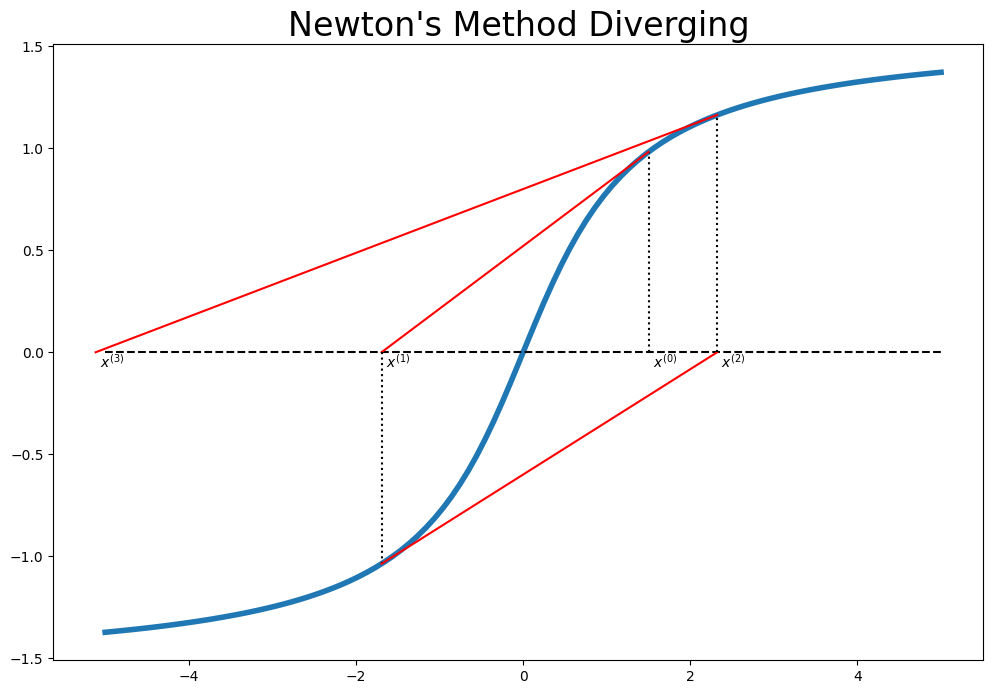

In [2]:
# Newton's method diverging because it was not
# initialized within any radius of convergence

plt.figure(figsize=(12,8))
plt.style.use('default')

x = np.linspace(-5,5,100)
plt.plot(x, np.arctan(x), linewidth=4)
plt.plot(x,[0]*len(x),'k--')
plt.title("Newton's Method Diverging", fontdict={'fontsize': 24})

x0 = 1.5
x = x0
plt.text(x, 0, ' $x^{(0)}$', verticalalignment='top')
for t in range(1,4):

    y = x*np.arctan(x) - 0.5*np.log(1+x**2)
    # dy/dx = arctan(x) # oh, okay
    dy_dx = np.arctan(x) 
    # ddy/dxdx = 1/(1+x^2) # oh, nice
    d2y_dx2 = 1/(1+x**2)
    # but on the other hand these might 
    # just be computed using autodiff

    x_t = x - dy_dx/d2y_dx2
    plt.plot([x, x], [0,dy_dx], 'k:')
    plt.plot([x,x_t], [dy_dx,0], c='r')
    plt.text(x_t, 0, ' $x^{('+str(t)+')}$', verticalalignment='top')
    x = x_t

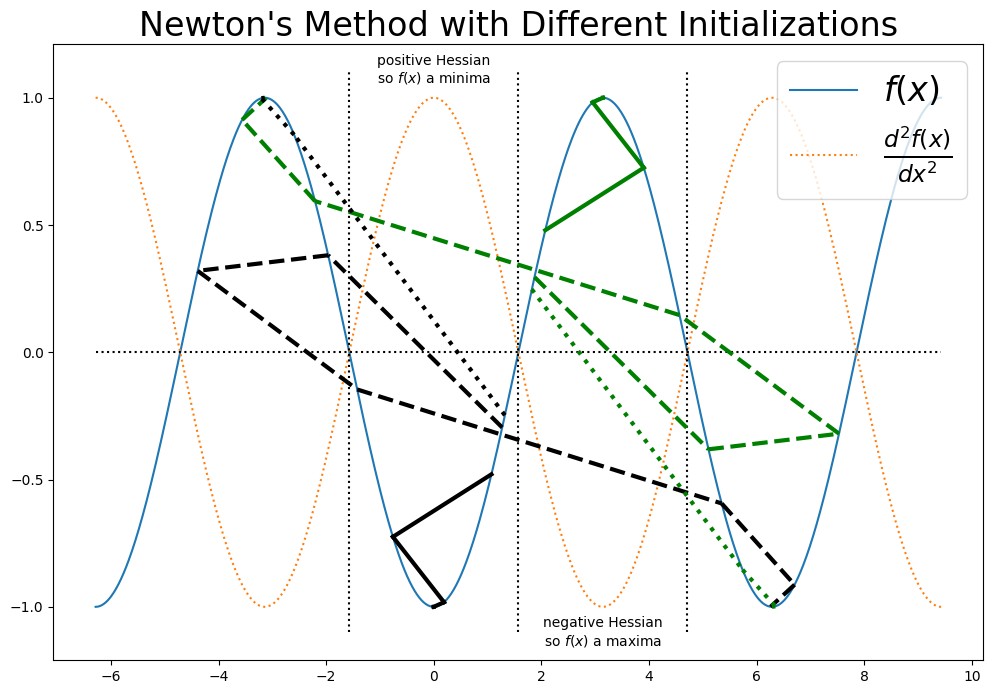

In [3]:
# Newton's method being eratic until crossing
# over a threshold of a radius of convergence

f = lambda x: -np.cos(x)
dfdx = lambda x: np.sin(x)
d2fdx2 = lambda x: np.cos(x)

x = np.linspace(-2*np.pi,3*np.pi,1000)
plt.figure(figsize=(12,8))
plt.plot(x,f(x), label='$f(x)$')
plt.plot(x,d2fdx2(x), ':', label='$\\frac{d^2f(x)}{dx^2}$')
plt.legend(fontsize=24)
plt.title("Newton's Method with Different Initializations",
          fontdict={'fontsize': 24}) 
plt.plot(x, 0*x, 'k:')
plt.plot([np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([-np.pi/2]*2, [-1.1,1.1], 'k:')
plt.plot([1.5*np.pi]*2, [-1.1,1.1], 'k:')

plt.text(0, 1.11, 'positive Hessian\nso $f(x)$ a minima', 
         horizontalalignment='center', verticalalignment='center')
plt.text(2*np.pi/2, -1.1, 'negative Hessian\nso $f(x)$ a maxima', 
         horizontalalignment='center', verticalalignment='center')

# Consider setting alpha to 0.1 in order to
alpha = 1#.1  # enforce hillclimb / descent
for x,style in zip([np.pi/2-.5, np.pi/2+.5, 
              np.pi/2-.3, np.pi/2+.3, 
              np.pi/2-.25, np.pi/2+.25], ['k','g','k--','g--','k:','g:']):
    for i in range(6):#0
        x_t = x - alpha*dfdx(x)/(d2fdx2(x)-0)
        plt.plot([x,x_t], [f(x),f(x_t)], style, linewidth=3)
        x = x_t

if alpha == 0.1:
    plt.text(2*np.pi/2, .4, 'enforce hillclimb', 
             horizontalalignment='center', verticalalignment='center')
    plt.text(0, -.4, 'encorce descent', 
             horizontalalignment='center', verticalalignment='center')
        

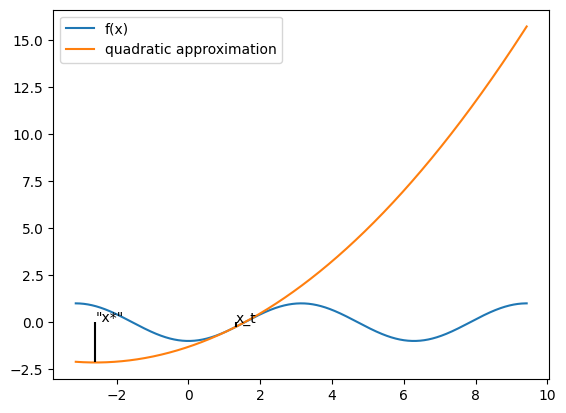

In [4]:
# The explanation of what's happening above is just that 
# Newton's method is optimization of the quadratic approximation 

quadratic_approximation = lambda x_star: f(x_t) + dfdx(x_t)*(x_star-x_t) + 0.5*d2fdx2(x_t)*(x_star-x_t)**2

x = np.linspace(-np.pi,3*np.pi,1000)
plt.plot(x, f(x), label="f(x)")
x_t = [np.pi/2+.5, np.pi/2+.3, np.pi/2-.25][2]
plt.plot(x, quadratic_approximation(x), label="quadratic approximation")

# approximation location
plt.vlines(x_t,0,f(x_t),'k')
plt.text(x_t,0,"x_t")

# approximated optimum
x_s = x_t - dfdx(x_t)/d2fdx2(x_t)

plt.vlines(x_s,0,quadratic_approximation(x_s),'k')
plt.text(x_s,0,'"x*"')

plt.legend();

### The Hessian

The **Hessian** is the ordered (**symmetric**) collection of **second order partial derivatives** defining **curvature** of $f$ at point $z'$ 

$$
\begin{align*}
[H_{f(z')}]_{ij} = \frac{\partial^2 f(z')}{\partial z_i\partial z_j}
 \quad \text{ so } \quad 
 H_{f(z')} = {} & \left[ \begin{array}{ccc}
\frac{\partial^2 f(z')}{\partial z_1\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_1\partial z_p}\\
\vdots & \ddots & \vdots \\
\frac{\partial^2 f(z')}{\partial z_p\partial z_1} & \cdots & \frac{\partial^2 f(z')}{\partial z_p\partial z_p}
\end{array} \right] = \underset{\text{be discussed}}{\underbrace{J\nabla_z f(z')}_{\text{Jacobian $J$ to}}} \\\\
= {} &\left[ \frac{\partial}{\partial z_1}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_k}\nabla_z f(z') \;\;\cdots\;\; \frac{\partial}{\partial z_p}\nabla_z f(z') \right]\\
= {} & \nabla_z \nabla_z^T f(z')
\end{align*}$$

**Curvature** $H_{f(z^*)} \quad$ not $\nabla_z f(z^*) = \mathbf{0}\quad$ distinguish between **minima** and **maxima** where $z^*$ will be a (local)
- **maximum** if $H_{f(z^*)}$ is **negative semi-definite** $x^T H_{f(z^*)} x \leq 0 \Longleftrightarrow \lambda_i \leq 0$ for all **eigenvalues** $\lambda_i$ of $H_{f(z^*)}$
  
- **minimum** if $H_{f(z^*)}$ is **positive semi-definite** $\; x^T H_{f(z^*)} x \geq 0 \Longleftrightarrow  \lambda_i \geq 0$ for all **eigenvalues** $\lambda_i$ of $H_{f(z^*)}$

---

The relationship between the (**negative** or **positive**) **definiteness** of $H_{ f(z^*)}$ and the (local **maxima** or **minima**) nature of the **optimum*** $f(z^*)$ can be seen from the generalization of **Taylor's Theorem** to scalar valued multivariate functions

\begin{align*}
f(z) = {} & f(z^*) + (z - z^*)^T\nabla_z f(z^*) + \frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*) \; \underbrace{+ \;O(||z-z^*||^3_2)}_{\text{the "Theorem" part}}
\end{align*}

since for $\nabla_z f(z^*) = \mathbf{0}$ and small deviations $z=z^*+\epsilon$ the difference

\begin{align*}
f(z) - f(z^*) = {} & \underbrace{\frac{1}{2}(z-z^*)^T H_{f(z^*)}(z-z^*)}_{O(||z-z^*||^2_2) \;\text{ dominates }\; O(||z-z^*||^3_2)} + O(||z-z^*||^3_2)
\end{align*}

- will be negative if $H_{f(z^*)}$ is **negative definite**, so $f(z^*)$ is a **maximum**
- will be positive if $H_{f(z^*)}$ is **positive definite**, so $f(z^*)$ is a **minimum**

### [Optional]: Univariate Secant versus Univariate Newton's

---

Assuming convergence Newton's method can be seen to have **quadratic convergence** based on the second order Taylor series approximation

$\begin{align*}
0 = g'(x^*) &\approx{} g'(x^{(t)}) + g''(x^{(t)})(x^*-x^{(t)}) + \frac{1}{2}g'''(x^{(t)})(x^*-x^{(t)})^2 \\
x^{(t)}-\frac{g'(x^{(t)})}{g''(x^{(t)})} - x^* &\approx{} (x^*-x^{(t)})^2 \frac{g'''(x^{(t)})}{2g''(x^{(t)})}\\
x^{(t+1)}-x^* & \approx{} (x^{(t)}-x^*)^2 \frac{g'''(x^{(t)})}{2g''(x^{(t)})} \\
\frac{\hat \epsilon^{(t+1)}}{(\hat \epsilon^{(t)})^2} &\approx{} \frac{g'''(x^{(t)})}{2g''(x^{(t)})} \\ 
\Longrightarrow \quad \lim_{t\rightarrow \infty} \frac{|\hat \epsilon^{(t+1)}|}{|\hat \epsilon^{(t)}|^\beta} &\approx{} c \quad \text{ where } \beta=2 \text{ and }  c = \left|\frac{g'''(x^{*})}{2g''(x^{*})}\right|\\
\end{align*}$

so $(\hat \epsilon^{(t)} = 0.1)^2 = \hat \epsilon^{(t+1)} = 0.01$ and $(\hat \epsilon^{(t+1)} = 0.01)^2 = \hat \epsilon^{(t+2)} =  0.0001$, etc. (with the precision of the converging answer approximately doubles at each iteration) which is the defintion of (**quadratic convergence**) the **convergence of order** $\beta=2$.

"Assuming convergence" above means that $x^{(t)}$ is within the **radius of convergence** around $x^*$ and **Newton's method** will then have this extremely fast convergence  when the **quadratic approximation** of the **second-order Taylor series** sufficiently approximates $g'(x^*)$.


#### The Secant Method

---

The **secant method** uses a **discrete difference** approximation of the second derivative $g''$ at $x^{(t)}$ in **Newton's method** 

$$ \text{ so } \quad  x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})(x^{(t)}-x^{(t-1)})}{g'(x^{(t)})-g'(x^{(t-1)})} \quad \text{ replaces } \quad x^{(t+1)} = x^{(t)} - \frac{g'(x^{(t)})}{g''(x^{(t)})}$$

which results in a theoretical convergence order $\beta = (1+\sqrt{5})/2 \approx 1.62$ (i.e., better than **linear** but worse than **quadratic convergence**).

However, **Newton's method** requires two function evaluations per iteration, i.e., $g'(x^{(t)})$ and $g''(x^{(t)})$ while the **secant method** only requires a single function evaluation per iteration because $g'(x^{(t)})$ may be used at step $t-1$ and reused on step $t$. This "per step cost versus number of steps" tradeoff is quite common in **iterative methods**, and in the case of 
**Newton's method** and the **secant method** the actual computational time requirements of the two methods are actually more competitive than is suggested by their theoretical **order of convergence**.  


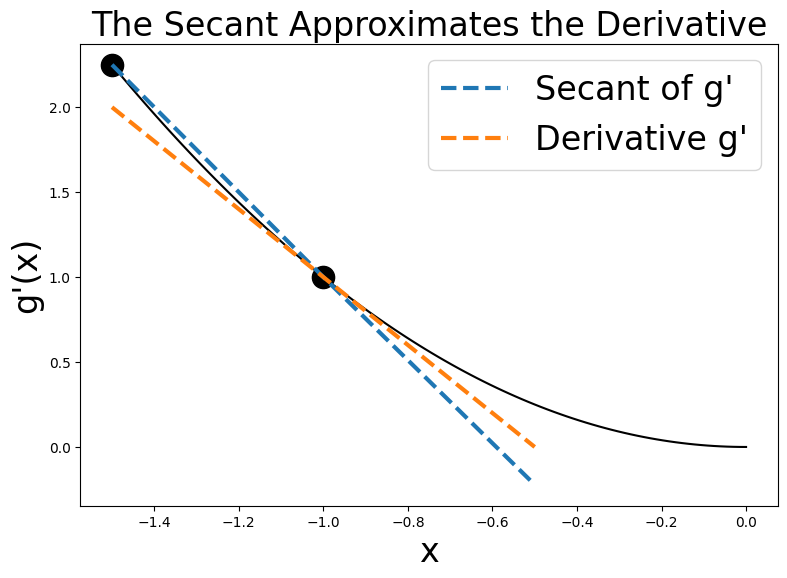

In [5]:
x = np.linspace(-1.5,0,100)
f = lambda x: x**2

plt.figure(figsize=(9,6))
plt.plot(x, f(x), 'k')
plt.plot(-1,1,'k.', markersize=32)

x0 = -1.5
plt.plot(x0, f(x0), 'k.', markersize=32)
step = 0.5
x1 = x0+step

plt.plot([x0,x1, x1+step], 
         [f(x0),f(x1),f(x1)/f(x0)*(x1+step)], '--', linewidth=3, label="Secant of g'")

plt.plot([x1-step, x1+step], 
         [f(x1)-2*x1*step, f(x1)+2*x1*step], '--', linewidth=3, label="Derivative g'")

plt.ylabel("g'(x)", fontdict={'fontsize': 24})
plt.xlabel("x", fontdict={'fontsize': 24})
plt.title('The Secant Approximates the Derivative',
          fontdict={'fontsize': 24})
_ = plt.legend(fontsize=24)

## Quasi-Newton Methods

---


Inspired by the assumption of the **secant method** which uses the approximation $\frac{g'(x^{(t)}) - g'(x^{(t-1)})}{(x^{(t)} - x^{(t-1)})} \approx g''(x^{(t)})$, a matrix $M^{(t-1)}$ satisfying the **secant condition**

$$ \overbrace{\nabla_{x}g(x^{(t)}) - \nabla_{x}g(x^{(t-1)})}^{\Delta^{(t)}_{\nabla_{x}g}} = M^{(t-1)}\overbrace{(x^{(t)} - x^{(t-1)})}^{\Delta_x^{(t)}}$$

provides a discrete approximation of the **Hessian** $H$ in the sense that $ M^{(t-1)}(x^{(t)} - x^{(t-1)}) \approx H (x^{(t)} - x^{(t-1)})$

Subject to some caveats the (computationally inexpensive) [rank-one update](https://personal.math.ubc.ca/~loew/m604/web-ho/sr1.pdf) 

$$M^{(t)} = M^{(t-1)} + \underbrace{\frac{v^{(t)}[v^{(t)}]^T}{[v^{(t)}]^T\Delta_x^{(t)}c}}_{\text{rank-one update}} \quad \text{ where } \quad v^{(t)} = \left(\Delta^{(t)}_{\nabla_{x}g} - M^{(t-1)}\Delta_x^{(t)}\right)$$

and the so-called **BFGS** (named after its authors) **rank-two version** 

$$\begin{align*} M^{(t)} = {} & M^{(t-1)} - \frac{M^{(t-1)}\Delta_x^{(t)} [M^{(t-1)}\Delta_x^{(t)}]^T}{[\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)}} + \frac{\Delta^{(t)}_{\nabla_{x}g}[\Delta^{(t)}_{\nabla_{x}g}]^T}{[\Delta_x^{(t)}]^T\Delta^{(t)}_{\nabla_{x}g}} + \delta^{(t)}\left([\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)} \right)[d^{(t)}]^Td^{(t)}\\
{} & \text{where } d^{(t)} = \frac{\Delta^{(t)}_{\nabla_{x}g}}{[\Delta_x^{(t)}]^T\Delta^{(t)}_{\nabla_{x}g}} - \frac{M^{(t-1)}\Delta_x^{(t)}}{[\Delta_x^{(t)}]^TM^{(t-1)}\Delta_x^{(t)}}
\end{align*}$$

(which is the **Broyden class update** with $\delta^{(t)}=0$) will also satisfy **secant condition** (with the latter additionally confering **hereditary definiteness**).


> If $M$ satisfies the **secant condition**
> 
> \begin{align*}
\nabla_{x}g(x^{(t+1)}) - \nabla_{x}g(x^{(t)}) &={} M(x^{(t+1)} - x^{(t)})\\{}\\
\text{so}\\{}\\
x^{(t+1)} & = {}  x^{(t)} - M^{-1}\nabla_x g(x^{(t)})\\
M(x^{(t+1)} - x^{(t)}) & = {} -\nabla_x g(x^{(t)})\\
\nabla_{x}g(x^{(t+1)}) - \nabla_{x}g(x^{(t)}) & = {} -\nabla_x g(x^{(t)})\\
\nabla_{x}g(x^{(t+1)}) = 0
\end{align*}
>
> The **Broyden class** of **quasi-Newton methods** use $M^{(t)}$ in place of $M$ above where $M^{(t)}$ satisfies the **secant condition**, but only when $M^{(t+1)}=M^{(t)}$ does this method converge. And in general $\nabla_{x}g(x^{(t+1)}) \neq 0$ after this step just as with **Newton's method** which it approximates.

<!-- $M^{(t)} \approx H_{g(x^{(t)})}$ need not necessarily be a good esimtate of the ***(negative) observed Fisher information*** -->

In [6]:
from scipy.optimize import fmin_l_bfgs_b

np.random.seed(3)
alpha,K = 0.01,10
d,q1,q2 = 3,2,3
# these are the data
x = np.random.normal(size=(d,1))
y = np.random.normal(size=(d,1))
# these are all the parameters
A1 = np.random.normal(size=(q1,d))
b1 = np.random.normal(size=(q1,1))
A2 = np.random.normal(size=(q2,q1))
b2 = np.random.normal(size=(q2,1))

# the parameters are passed into the function as a vector
# https://stackoverflow.com/questions/8672005/correct-usage-of-fmin-l-bfgs-b-for-fitting-model-parameters
def objective(parameters):
    # parameters get unpacked into their model form
    A1 = parameters[0:(q1*d)].reshape(q1,d)
    b1 = parameters[(q1*d):(q1*d+q1)].reshape(q1,1)
    A2 = parameters[(q1*d+q1):(q1*d+q1+q2*q1)].reshape(q2,q1)
    b2 = parameters[(q1*d+q1+q2*q1):].reshape(q2,1)
    # this is the model form
    x1 = A1@x+b1
    x1 = x1*(x1>0)
    x2 = A2@x1+b2
    # here's the residual from the prediction of this model
    epsilon = y-x2
    # and here's the loss function
    return epsilon.T.dot(epsilon)[0,0]**0.5

# https://stackoverflow.com/questions/8672005/correct-usage-of-fmin-l-bfgs-b-for-fitting-model-parameters
fmin_l_bfgs_b(func=objective, x0=np.ones(q1*d+q1+q2*q1+q2), approx_grad=True, m=4)
# showing this for a latent dimension of 4 (1 or 2 does not work)

(array([-0.96574895,  0.52026429,  0.89394714, -0.96574895,  0.52026429,
         0.89394714, -0.09902554, -0.09902554, -0.2844477 , -0.2844477 ,
         0.11431975,  0.11431975,  0.0948675 ,  0.0948675 , -1.86349271,
        -0.2773882 , -0.35475898]),
 4.949179999472878e-09,
 {'grad': array([0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.04897482,
         0.72436726, 0.68328732]),
  'task': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'funcalls': 972,
  'nit': 24,
  'warnflag': 0})

In [7]:
# Indeed this converges for BFGS with rank 4
fit_parameters = fmin_l_bfgs_b(func=objective, x0=np.ones(q1*d+q1+q2*q1+q2), approx_grad=True, m=4)[0]
A1 = fit_parameters[0:(q1*d)].reshape(q1,d)
b1 = fit_parameters[(q1*d):(q1*d+q1)].reshape(q1,1)
A2 = fit_parameters[(q1*d+q1):(q1*d+q1+q2*q1)].reshape(q2,q1)
b2 = fit_parameters[(q1*d+q1+q2*q1):].reshape(q2,1)
x1 = A1@x+b1
x1 = x1*(x1>0)
x2 = A2@x1+b2
np.c_[y,x2]

array([[-1.8634927 , -1.86349271],
       [-0.2773882 , -0.2773882 ],
       [-0.35475898, -0.35475898]])

# Lecture

First hour of class

---


## Line Search (and Direction Search)

---

**Gauss-Seidel** and (**Nonlinear Gauss-Seidel**) "optimally" updates one direction $x_j$ at a time 

$$\overset{\text{(depending on objective)}}{\min_{\alpha^{(k)}} \rho(\alpha^{(k)}) \;\text{ or } \;\max_{\alpha^{(k)}} \rho(\alpha^{(k)})} \quad \text{ where } \quad \rho(\alpha^{(k)}) = \overset{\text{if updating the $x_j$ direction}}{f\left(x^{(k)} + \alpha^{(k)}e_j^{(k)}\right)} = \overset{\text{if updating general direction $d^{(k)}$}}{f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right)}$$

but finding the optimal distance to update $x^{(k)}$ to $x^{(k+1)}$ for an arbitrary **direction** $d^{(k)}$ is the (also **univariate**) **line search problem**

When **successive overrelaxation** is applied to **(nonlinear) Gauss-Seidel**

- $\omega_i<1$ applied at the elementwise update level $x_{i}^{(k+1)}$ provides a mechanism to influence the **direction** $d^{(k)} = x^{(k+1)} - x^{(k)}$


- $\omega_k>1$ applied at the iteration update level $x^{(k+1)}$ subsequently suggests the **line search problem** in **direction** $d^{(k)}$

> - **Successive overrelaxation** applied to **(nonlinear) Jacobi algorithm** might offer a slightly different range of **directions** $d^{(k)}$
>
>
> - **Gradient descent** chooses **direction** $d^{(k)} = - \nabla_x f(x^{(k)})$




In [11]:
import statsmodels.api as sm
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
plt.style.use('seaborn-v0_8-colorblind')


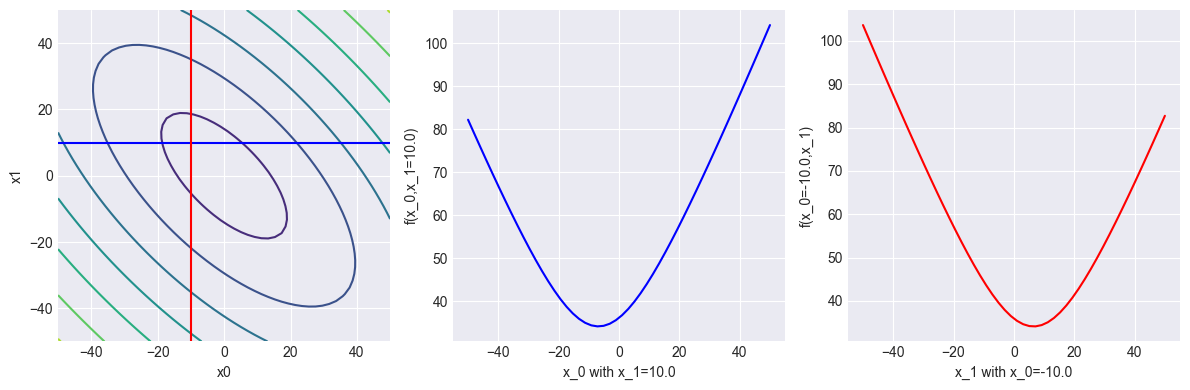

In [14]:
# Here is the Ax=b problem specified as an equivalent quadratic problem

# the quadratic function evaluated over a grid of x
n, lim = 50, 50
x1, x2 = np.meshgrid(np.linspace(-lim,lim,n), np.linspace(-lim,lim,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
A, b, c = np.eye(2)+2, np.ones((2,1)), 10**3
offset_ = np.array([[0],[0]])
fx = ((X.dot(A)*X).sum(axis=1) + X.dot(offset_*b).flatten() + c).reshape(n,n)

# Assumes A, b, and c
def build_univariate_f(i, other_x):
    '''
    Take univariate slice bivariate fx
    as f(x) = f(x,other_x) if i=0
    as f(x) = f(other_x,x) if i=1
    '''
    @np.vectorize
    def f(x_i):
        if i:
            x = np.array([other_x, x_i])
        else:
            x = np.array([x_i, other_x])
        return x.dot(A).dot(x) + x.dot(b) + c
    return f

def bivariate_f(x):
    return x.dot(A).dot(x) + x.dot(b) + c

fig,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].contour(x1, x2, np.sqrt(fx))
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')

x_i_grid = np.linspace(-lim,lim,n)
i = 0
x_1 = 10.
ax[1].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_1)(x_i_grid) ),
           c='blue')
ax[0].hlines(x_1, -50, 50, color='blue')
ax[1].set_xlabel('x_0 with x_1='+str(x_1))
ax[1].set_ylabel('f(x_0,x_1='+str(x_1)+')')

i = 1
x_0 = -10.
ax[2].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_0)(x_i_grid) ),
           c='red')
ax[0].vlines(x_0, -50, 50, color='red')
ax[2].set_ylabel('f(x_0='+str(x_0)+',x_1)')
ax[2].set_xlabel('x_1 with x_0='+str(x_0))
plt.tight_layout()

array([[-0.09989242],
       [-0.09999985]])

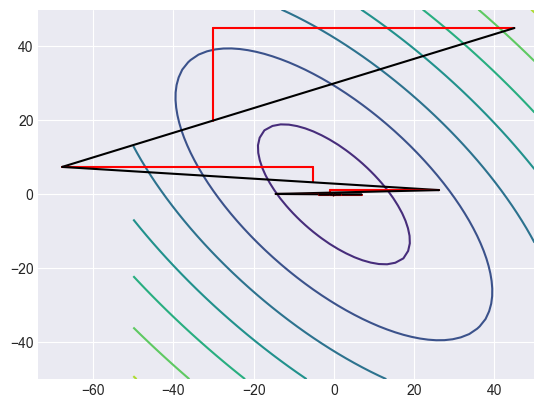

In [15]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1.5
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk
    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

array([[-0.1000032 ],
       [-0.09999787]])

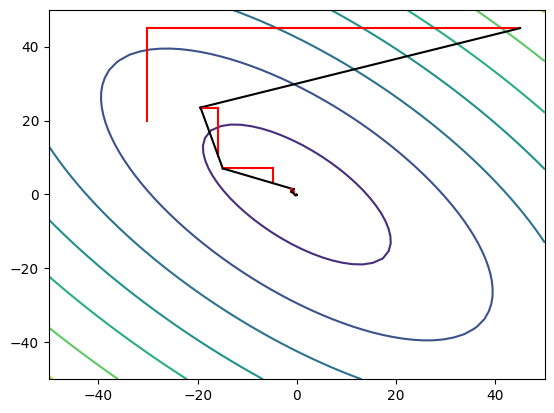

In [7]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()

    #xk = (1-w2)*xkm1+w2*xk
    if all(np.abs(xk-xkm1) < 1e-5):
        break
    a = optimize.minimize_scalar(lambda a: bivariate_f((xkm1+a*(xk-xkm1)).flatten()), method='brent').x
    xk = xkm1 + a*(xk-xkm1)

    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

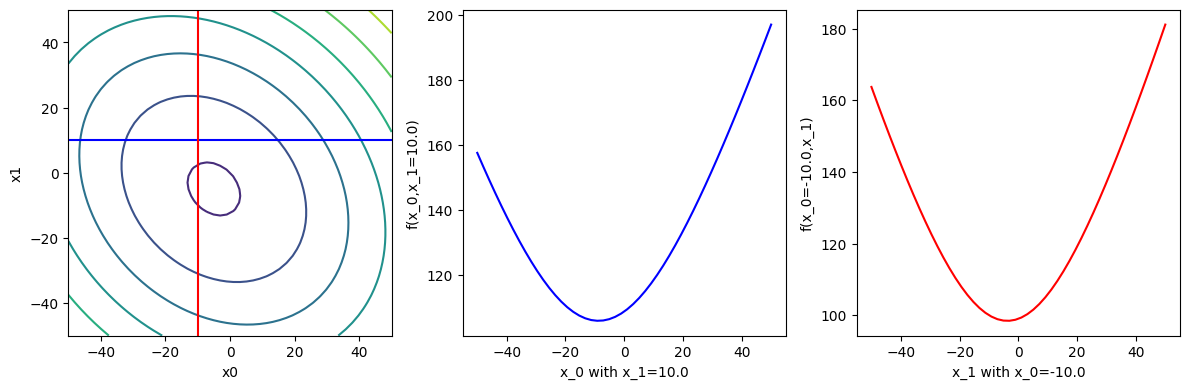

In [8]:
# Here is the ridge problem specified as an equivalent quadratic problem

# the quadratic function evaluated over a grid of x
n, lim = 50, 50
x1, x2 = np.meshgrid(np.linspace(-lim,lim,n), np.linspace(-lim,lim,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
A, b, c = np.eye(2)+2, np.ones((2,1)), 10**4
offset_ = np.array([[100],[100]])
lambda_ = 5
fx = ((X.dot(A+lambda_*np.eye(2))*X).sum(axis=1) + X.dot(offset_*b).flatten() + c).reshape(n,n)

# Assumes A, b, and c
def build_univariate_f(i, other_x):
    '''
    Take univariate slice bivariate fx
    as f(x) = f(x,other_x) if i=0
    as f(x) = f(other_x,x) if i=1
    '''
    @np.vectorize
    def f(x_i):
        if i:
            x = np.array([other_x, x_i])
        else:
            x = np.array([x_i, other_x])
        return x.dot(A+lambda_*np.eye(2)).dot(x) + x.dot(offset_*b) + c
    return f

def bivariate_f(x):
    return x.dot(A+lambda_*np.eye(2)).dot(x) + x.dot(offset_*b) + c

fig,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].contour(x1, x2, np.sqrt(fx))
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')

x_i_grid = np.linspace(-lim,lim,n)
i = 0
x_1 = 10.
ax[1].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_1)(x_i_grid) ),
           c='blue')
ax[0].hlines(x_1, -50, 50, color='blue')
ax[1].set_xlabel('x_0 with x_1='+str(x_1))
ax[1].set_ylabel('f(x_0,x_1='+str(x_1)+')')

i = 1
x_0 = -10.
ax[2].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_0)(x_i_grid) ),
           c='red')
ax[0].vlines(x_0, -50, 50, color='red')
ax[2].set_ylabel('f(x_0='+str(x_0)+',x_1)')
ax[2].set_xlabel('x_1 with x_0='+str(x_0))
plt.tight_layout()

array([[-4.99999969],
       [-5.00000022]])

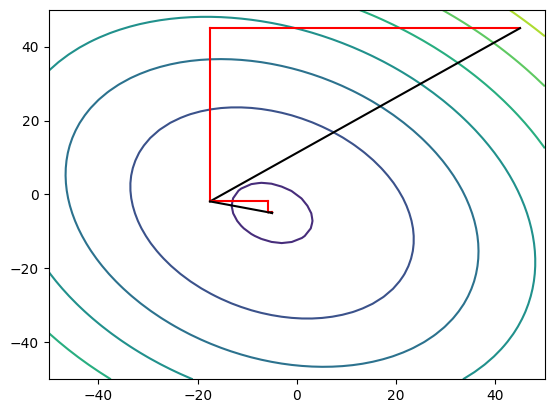

In [9]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk
    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

array([[-5.00000035],
       [-4.99999991]])

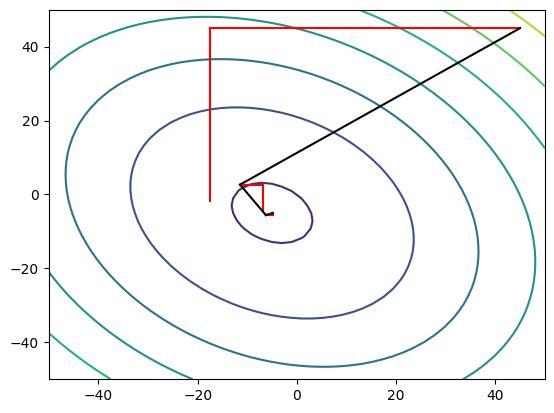

In [10]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()

    #xk = (1-w2)*xkm1+w2*xk
    if all(np.abs(xk-xkm1) < 1e-5):
        break
    a = optimize.minimize_scalar(lambda a: bivariate_f((xkm1+a*(xk-xkm1)).flatten()), method='brent').x
    xk = xkm1 + a*(xk-xkm1)

    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

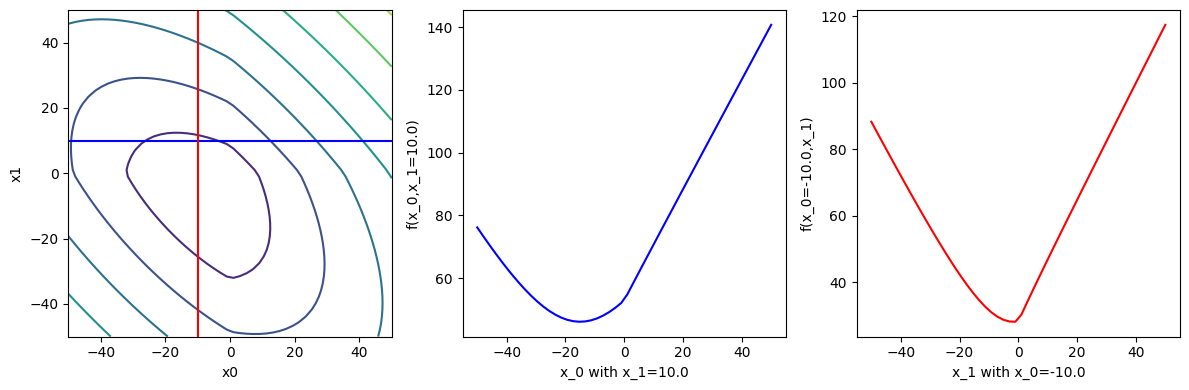

In [11]:
# Here is the version lasso problem

# the quadratic function evaluated over a grid of x
n, lim = 50, 50
x1, x2 = np.meshgrid(np.linspace(-lim,lim,n), np.linspace(-lim,lim,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
offset_ = np.array([[100],[100]])
lambda_ = 50
A, b, c = np.eye(2)+2, np.ones((2,1)), 10**3
fx = ((X.dot(A)*X).sum(axis=1) + X.dot(offset_*b).flatten() + c + lambda_*np.abs(X).sum(axis=1)).reshape(n,n)

# Assumes A, b, and c
def build_univariate_f(i, other_x):
    '''
    Take univariate slice bivariate fx
    as f(x) = f(x,other_x) if i=0
    as f(x) = f(other_x,x) if i=1
    '''
    @np.vectorize
    def f(x_i):
        if i:
            x = np.array([other_x, x_i])
        else:
            x = np.array([x_i, other_x])
        return x.dot(A).dot(x) + x.dot(offset_*b) + c + lambda_*np.abs(x).sum()
    return f

def bivariate_f(x):
    return x.dot(A).dot(x) + x.dot(offset_*b) + c + lambda_*np.abs(x).sum()

fig,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].contour(x1, x2, np.sqrt(fx))
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')

x_i_grid = np.linspace(-lim,lim,n)
i = 0
x_1 = 10.
ax[1].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_1)(x_i_grid) ),
           c='blue')
ax[0].hlines(x_1, -50, 50, color='blue')
ax[1].set_xlabel('x_0 with x_1='+str(x_1))
ax[1].set_ylabel('f(x_0,x_1='+str(x_1)+')')

i = 1
x_0 = -10.
ax[2].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_0)(x_i_grid) ),
           c='red')
ax[0].vlines(x_0, -50, 50, color='red')
ax[2].set_ylabel('f(x_0='+str(x_0)+',x_1)')
ax[2].set_xlabel('x_1 with x_0='+str(x_0))
plt.tight_layout()

array([[-5.00000181],
       [-4.99999894]])

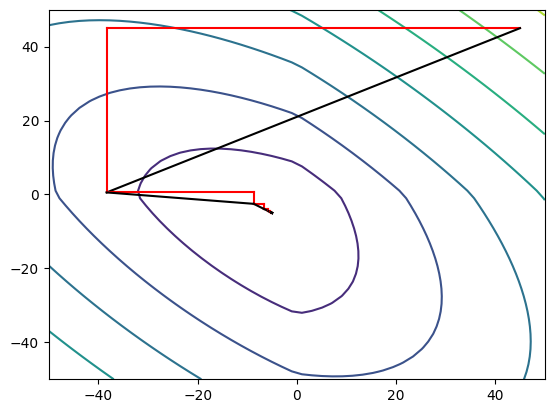

In [12]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk
    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

array([[-4.99999865],
       [-5.00000075]])

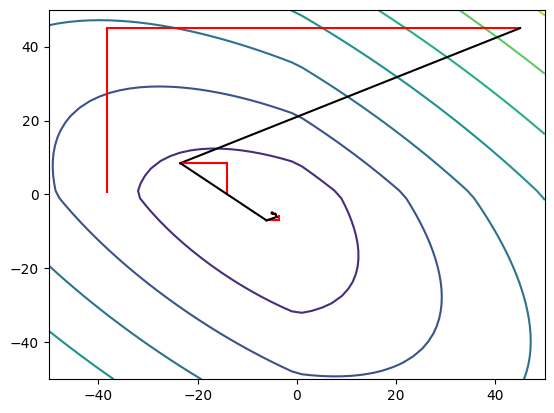

In [13]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = 1,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()

    #xk = (1-w2)*xkm1+w2*xk
    if all(np.abs(xk-xkm1) < 1e-5):
        break
    a = optimize.minimize_scalar(lambda a: bivariate_f((xkm1+a*(xk-xkm1)).flatten()), method='brent').x
    xk = xkm1 + a*(xk-xkm1)

    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

In [14]:
def func(x):
    return np.sqrt(np.abs(x[:,0] * np.cos(.1*x[:,1]) - 10 + x[:,1] * x[:,0] - x[:,1]))

fx = func(X).reshape(n,n)

def build_univariate_f(i, other_x):
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html
    @np.vectorize
    def f(x_i):
        if i:
            x = np.array([other_x, x_i])
        else:
            x = np.array([x_i, other_x])
        return np.sqrt(np.abs(x[0] * np.cos(.1*x[1]) - 10 + x[1] * x[0] - x[1]))
    return f

def bivariate_f(x):
    return np.sqrt(np.abs(x[0] * np.cos(.1*x[1]) - 10 + x[1] * x[0] - x[1]))

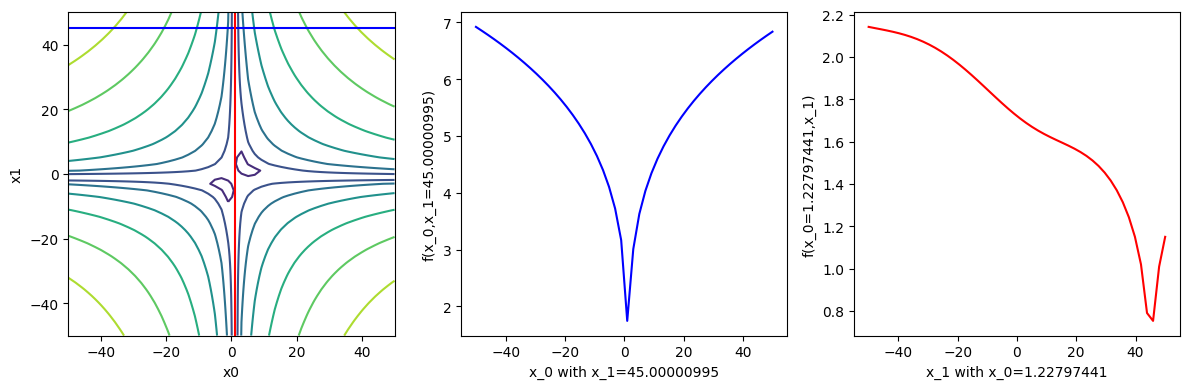

In [15]:
fig,ax = plt.subplots(1,3, figsize=(12,4))
ax[0].contour(x1, x2, np.sqrt(fx))
ax[0].set_xlabel('x0')
ax[0].set_ylabel('x1')

x_i_grid = np.linspace(-lim,lim,n)
i = 0
x_1 = 45.00000995
ax[1].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_1)(x_i_grid) ),
           c='blue')
ax[0].hlines(x_1, -50, 50, color='blue')
ax[1].set_xlabel('x_0 with x_1='+str(x_1))
ax[1].set_ylabel('f(x_0,x_1='+str(x_1)+')')

i = 1
x_0 = 1.22797441
ax[2].plot(x_i_grid,
           np.sqrt( build_univariate_f(i=i, other_x=x_0)(x_i_grid) ),
           c='red')
ax[0].vlines(x_0, -50, 50, color='red')
ax[2].set_ylabel('f(x_0='+str(x_0)+',x_1)')
ax[2].set_xlabel('x_1 with x_0='+str(x_0))
plt.tight_layout()

array([[3.52212902],
       [2.61592325]])

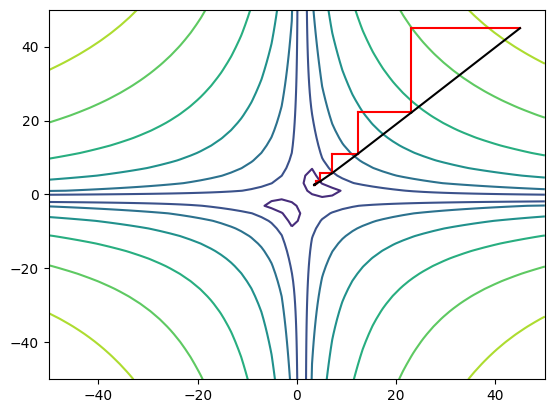

In [16]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = .5,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()
    xk = (1-w2)*xkm1+w2*xk
    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

array([[-1.9977177 ],
       [-3.95094383]])

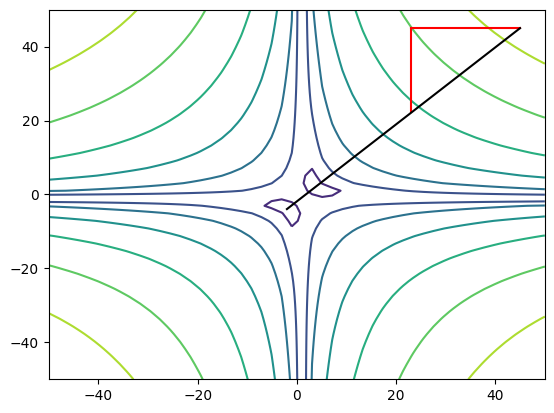

In [17]:
# set w1 and w2 to 1 for coordinate descent
# set 0<w1<1 for coordinate wise successive overrelaxation
# set 0<w2<1 for subsequent additional full vector successive overrelaxation
w1,w2 = .5,1
s,x0 = 20,45.0*np.ones((2,1))
fig,ax = plt.subplots()
ax.contour(x1, x2, np.sqrt(fx)) # ax.set(aspect=1)
for k in range(s):# coordinate-wise and vector-wise successive overrelaxation
    xkm1 = x0.copy()
    for i in range(2):
        xk = x0.copy()
        univariate_f = build_univariate_f(i, x0[1-i][0])
        xi = optimize.minimize_scalar(univariate_f, method='brent').x
        xk[i] = (1-w1)*xk[i]+w1*xi; plt.plot([x0[0],xk[0]], [x0[1],xk[1]], 'r')
        x0 = xk.copy()

    #xk = (1-w2)*xkm1+w2*xk
    if all(np.abs(xk-xkm1) < 1e-5):
        break
    a = optimize.minimize_scalar(lambda a: bivariate_f((xkm1+a*(xk-xkm1)).flatten()), method='brent').x
    xk = xkm1 + a*(xk-xkm1)

    plt.plot([xkm1[0],xk[0]], [xkm1[1],xk[1]], 'k')
    xkm1 = xk.copy()
    x0 = xkm1.copy()
xk

## The Computational Tradeoffs of Iterative Methods 

### Direction Search versus Line Search

A single $x^{(k+1)}$ update may balance computational resources between finding "optimal" $d^{(k)}$ and "optimal" $\alpha^{(k)}$. 

If a "good" **direction** $d^{(k)}$ is found the **line search** is a **univariate** (easier) subproblem of **multivariate optimization** especially since many available quick approximate solutions of

$$\displaystyle \alpha^{(k)} = \underset{\alpha^{(k)}}{\text{argmin }}f\left(x^{(k)}_j + \alpha^{(k)}d^{(k)}\right) = \underset{\alpha^{(k)}}{\text{argmin }} \rho(\alpha^{(k)})$$

- A small number of $t$ steps of **bisection** to find $\rho'([\alpha^{(k)}]^{(t)}) \approx 0$ based on initializing $\rho'(a)<0<\rho'(b)$ <br><br>

    - `optimize.minimize_scalar(lambda a: bivariate_f((xkm1+a*(xk-xkm1)).flatten()), method='brent').x` is a sophisticated **bracketing** method run with a predefined **stopping rule**<br><br>
    
    - **Ternary search** is the "optimization version" of **bisection search** finding $\rho([\alpha^{(k)}]^{(t)}) \approx \underset{\alpha^{(k)}}{\text{argmin }} \rho(\alpha^{(k)})$ and the **golden section search** is a preferred variation which offers computational efficiency through clever re-use of function evaluations reducing computational requirements at each iteration
    
    
    
- And an even simpler approach is **backtracking**<br><br>

    - by increasing $s$ so long as $\rho(s\times \alpha^{(k)})$ continues to decrease<br><br>
    - and more sophisticated versions of this based on **sufficient decrease** and/or **curvature conditions** are also possible<br><br>
    

- Or $\rho(\alpha^{(k)})$ could be given a **polynomial approximation** (which is easily minimized<br><br>

    - **Newton's method** optimizes the **quadratic approximation**

### Per Step versus Total Steps

Finding "optimal" $d^{(k)}$ and "optimal" $\alpha^{(k)}$ will also have dimenishing returns if even better "optimal" $d^{(k+1)}$ and "optimal" $\alpha^{(k+1)}$ might be found

1. **Coordinate descent** puts no effort into $d^{(k)}$ but lots of effort into $\alpha^{(k)}$

> It's quite good so long as the dimension is not too high...

2. **Gradient descent** puts reasonable effort into $d^{(k)}$ no minimal effort into $\alpha^{(k)}$ (beyond setting a fixed $\alpha$)

> With respect to the **Per Step versus Total Steps tradeoff** it heavily favors the latter by **limiting per step cost** in favor of **more overall total steps** and this seems to be a winning approach in modern high dimensional optimization problems

3. **Successive overrelation** offers a way to balance both $d^{(k)}$ and $\alpha^{(k)}$

> The improved convergence rates often observed for **successive overrelaxation** demonstrates the potential benefits of (even indirectly) balancing **drection** $d^{(k)}$ and **line** $\alpha^{(k)}$ searches

4. **Newton's method** optimizes $d^{(k)}$ and $\alpha^{(k)}$ based on a **quadratic approximation**

> **Quasi-Newton's methods** put less effort into the **direction** $d^{(k)}$ search based on their approximation
    
5. **Conjugate gradient methods** seek to (in some sense) optimize $d^{(k)}$ and $\alpha^{(k)}$ simultaneously

> This will be demonstrated below momentarily...


In [ ]:
# Abstract Iterative Algorithm Pseudocode

# Some f(λ) = θ(λ) has no known analytical form 
# [so this "surface" must be learned and optimized simultaneously]
for λ in tuning_hyperparamters:
    
    # E.g. Trace trajectory from null to saturated models
    # E.g. Bayesian Optimization
    
    # If using an iterative method...
    for k in parameter_iterations: # total steps
        
        # Some known analytical objection
        # function is being optimized
        for j in update_iterations: # per step cost
            
            # E.g. Compute Hessian and "invert" Ax=b
            # E.g. Approximate Ax=b with Quasi-Newton 
            # E.g. or truncated Newton with Gauss-Seidel or Conjugate Gradient
            # E.g. Skip Hessian and do gradient descent
            # E.g. Skill that an do coordinate descent 
            # E.g. perhaps with oversuccessive relexation
            
            create_Δ_change
                
        θ(λ)[k+1] = θ(λ)[k] + create_Δ_change
        
        if stopping_condition_reached:            
            break
 

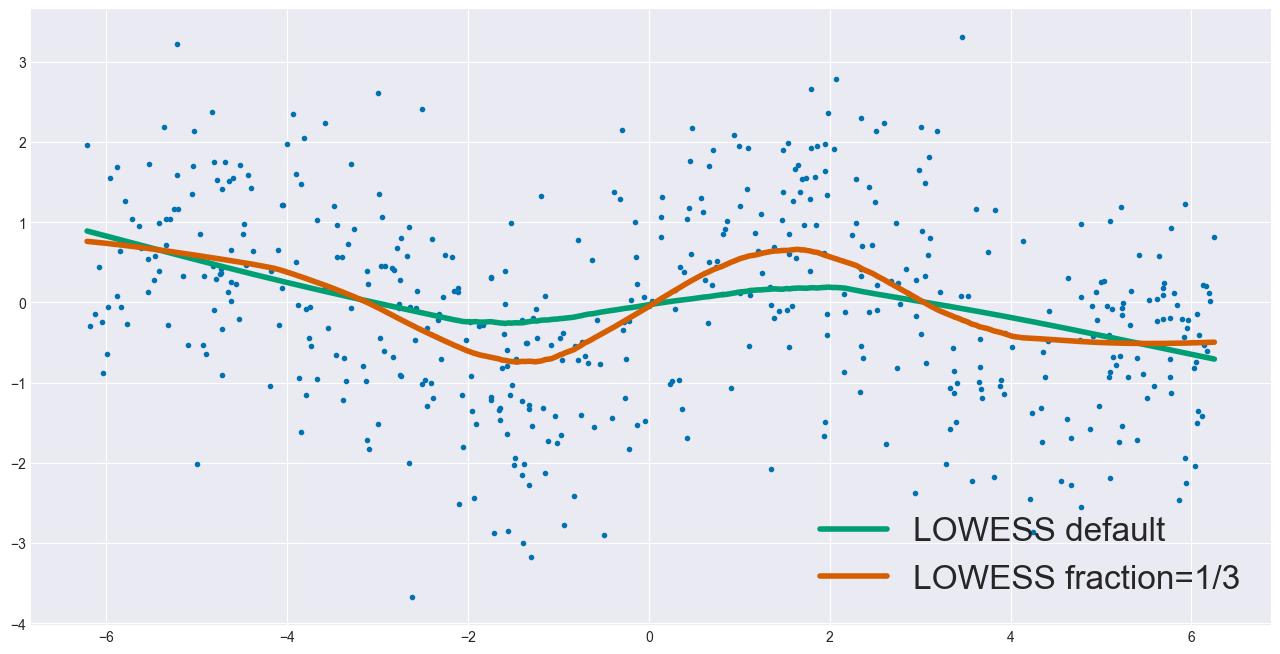

In [16]:
lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x)
w = lowess(y, x, frac=1./3)
plt.figure(figsize=(16,8))
plt.plot(x,y,'.')
plt.plot(*z.T, label='LOWESS default', linewidth=4)
plt.plot(*w.T, label='LOWESS fraction=1/3', linewidth=4)
_ = plt.legend(fontsize=24)

[[0.05       1.13580004]
 [0.3        1.11638679]
 [0.5        1.13745145]
 [0.9        1.20646172]]


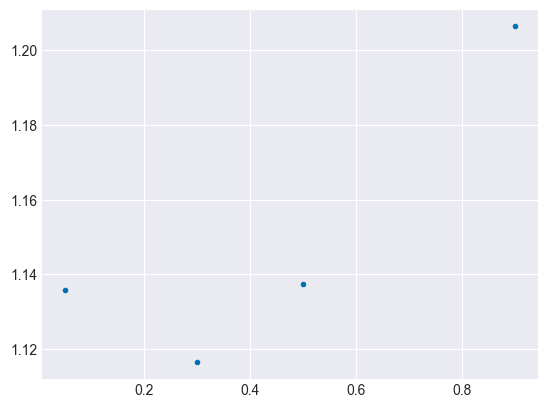

In [22]:
from sklearn.model_selection import KFold
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error   
kf = KFold(n_splits=5) # 3 and 10 are common alterntives

KFoldsOutOfSampleMSEs=[]

frac = np.random.uniform()
tuning_parameter = [.05,.3,.5,.9]
observed_MSE_cost = [0]*len(tuning_parameter)
for i in range(len(tuning_parameter)):
    for train_index, test_index in kf.split(x[:,np.newaxis]):
        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]
        xyhat = lowess(y_train, x_train, frac=tuning_parameter[i])
        yhat = interp1d(*xyhat.T, bounds_error=False, fill_value="extrapolate")
        KFoldsOutOfSampleMSEs += [mean_squared_error(y_test, yhat(x_test))]
        #KFoldsInSampleMSEs += [mean_squared_error(y_train, yhat(x_train))]
    
    observed_MSE_cost[i] = [np.mean(KFoldsOutOfSampleMSEs)]

print(np.c_[tuning_parameter, observed_MSE_cost])
plt.plot(tuning_parameter, observed_MSE_cost, '.')

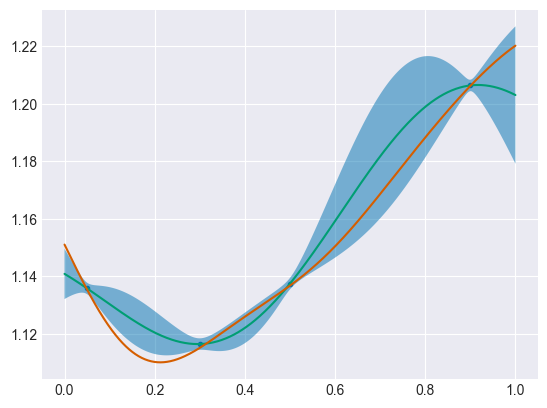

In [24]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1*RBF(length_scale=.25, length_scale_bounds="fixed")
noise_std = 0.001
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, alpha=noise_std**2, n_restarts_optimizer=9)
gaussian_process.fit(np.array(tuning_parameter).reshape(-1, 1), 
                     np.array(observed_MSE_cost).reshape(-1, 1)-np.mean(observed_MSE_cost))
grid = np.linspace(0,1,1000).reshape(-1, 1)
mean_prediction, std_prediction = gaussian_process.predict(grid, return_std=True)

plt.plot(tuning_parameter, observed_MSE_cost, '.')
plt.plot(grid, mean_prediction+np.mean(observed_MSE_cost))
plt.fill_between(grid.flatten(), mean_prediction+np.mean(observed_MSE_cost)-2*std_prediction, 
                                 mean_prediction+np.mean(observed_MSE_cost)+2*std_prediction, alpha=0.5)
uncertainty_draw = gaussian_process.sample_y(grid, random_state=None)
plt.plot(grid, uncertainty_draw+np.mean(observed_MSE_cost));

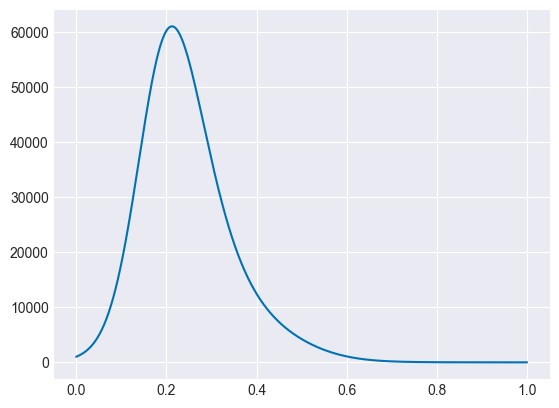

In [25]:
temperature = 1/100
plt.plot(grid,np.exp(-(uncertainty_draw-max(uncertainty_draw))/temperature))

### Conjugate Gradient Methods (Part 1)
--- 

The idea behind ***gradient descent*** is to devote computational resources towards finding a better direction for a ***line search method*** rather than the optimal length... indeed, ***gradient descent*** often just uses fixed ***step size factor*** $\alpha$

In highly ***isotropic*** contexts ***gradients*** are highly predictive; so, efficient optimiztion will be based on length optimization of a ***line search method*** along the ***gradient*** direction rather than wastefully recomputing similar ***gradients***

***Congugate gradient methods*** address ***anisotropic*** contexts by using ***gradient*** directions, but carefully adjusted in conjunction with a sophisticated ***line search method*** to create an optimal tradeoff between direction and length

> The problem with ***gradient descent*** is that if the ***step size factor*** is not chosen well, the ***line search*** aspect of ***gradient descent*** will be poor and the algorithm won't be efficient

Despite ***gradient descent*** trying to choose "optimal" directions, it's general character remains similar to ***coordinate descent*** with both being very "stair steppy" because even though ***coordinate descent*** is resticted to move along a coordinate axis, it does so optimally; whereas, without special step size factors $\alpha_k$ ***gradient descent*** is not particularly optimal along the directions it moves; so, both methods have symmetrical drawbacks as ***gradient descent*** chooses directions (but not step sizes) well, whereas  ***coordinate descent*** contrarily chooses step sizes (but not directions) well



### Conjugate Gradient Methods (Part 2)
--- 

***Conjugate gradient methods*** endevor to determine 

1. a previously unexplored iteration direction
2. an optimal step size to take in that direction

and to thus find both optimal directions (like ***gradient descent***) as well as optimal step sizes (like ***coordinate descent***) 

$-\nabla_x f(x^{(k)})$ is the [direction of steepest descent](https://math.stackexchange.com/questions/223252/why-is-gradient-the-direction-of-steepest-ascent) of the scalar valued multivariate function $f$ at domain location $x^{(k)}$

$$d_k = -\nabla_x f(x^{(k)}) \quad \text{ and } \quad x^{(k+1)} = x^{(k)} + \alpha d_k$$

but steps following these directions (often) do not efficiently approach $x^* = \text{argmin} f(x)$

Taking steps along ***Q-conjugate*** variant directions $\tilde{d_k}$ of $d_k$ satisfying $\tilde{A^*}$-***conjugacy*** (***Q-conjugacy*** with respect to $\tilde{A^*}$)

$$\tilde{d_j}^T \!\!\tilde{A^*}\tilde{d_k}=0 \text{ for } j=0,...,k-1 \quad \text{ where } \quad \tilde{A^*} \text{ characterizes $f$'s orientation}$$



$$x^{(k+1)} = x^{(k)} + {\alpha_k} \tilde{d_k} \quad \text{ where } \quad {\alpha_k} \text{ is chosen to maximize }  \underset{\text{for the adjustment } {\alpha_k}\tilde{d^{(k)}}}{\overset{\text{change in the direction }\tilde{d_k}}{f(x^{(k)})-f(x^{(k+1)})}}$$

can be more efficient...

### Conjugate Gradient Methods (Part 3)
--- 

There are two convenient ways to use a ***conjugate gradient method*** for

$$f(x) = (b - Ax)^T A^{-1} (b - Ax) \quad \text{ with } \quad -\nabla_x f(x^{(k)}) = b - Ax^{(k)}$$

| The most common approach is based on [$A$-***conjugacy***](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) | An alternative approach is based on $A^2$-*conjugacy* | 
|-|-|
|0. Let $\tilde{A^*}=A$, and for any initial $x^{(0)}$<br><br>1. Set $\tilde{d_0} = d_0 = -\nabla_x f(x^{(0)})$<br><br>2. Then enforce $A$-***conjugacy***<br>$\tilde{d_k}^T\!\!A\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$by choosing<br>$\tilde{d_k}$ through a ***Gram-Schmidt-like*** procedure which provides an<br>"$A$-***conjugate*** orthogonalization"<br><br>3. and use the optimal step size factor ${\alpha_k}$ as specified by [the algorithm](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm)| 0. Let $\tilde{A^*} = A^2 = AA$, and for any initial $x^{(0)}$<br>1. Set $\tilde{d_0} = Ad_0 = Ar^{(0)} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(0)}}}^{r^{(0)}})$<br>2. Then make the updates provided below so the [projection](https://en.wikipedia.org/wiki/Vector_projection)<br>of $r^{(k-1)}$ onto $A\tilde d^{(k-1)}$ is removed from $r^{(k-1)}$ to produce<br>$r^{(k)}$ which now has no contribution in the $A\tilde d^{(k-1)}$ direction. <br>3. Set $\tilde{d_{k}} = A(\overbrace{\underset{\text{the "residual"}}{b-Ax^{(k)}}}^{r^{(k)}}) + \overbrace{\frac{||Ar^{(k)}||_2^2}{||{\tilde d^{(k-1)}}|| _2^2}}^{\omega}{\tilde d^{(k-1)}}$<br>which (as demonstrated below) will ensure $A^2$-*conjugacy*<br> $\tilde{d_k}^T\!\!A^2\,\tilde{d_j}=0$ for all $k>0$ and $j=0,...,k-1$ |

$$\tiny
\begin{align*}
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&{\alpha_k} ={}& \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2}& x^{(k)} ={}& x^{(k-1)} + \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} {\tilde d^{(k-1)}}\\
\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad&&b-Ax^{(k)} ={}& b-Ax^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}} & r^{(k)} ={}& r^{(k-1)} - \frac{||{\tilde d^{(k-1)}}||_2^2}{||A{\tilde d^{(k-1)}}||_2^2} A{\tilde d^{(k-1)}}
\end{align*}$$

### 6.4.C Conjugate Gradient Methods 
--- 

The key to the $A^2$-***conjugacy*** $\tilde{d_0}^T\!\!A^2\tilde{d_1} = 0$ version works is the $\omega$ adjustment to the $A$-transform of the "residual"

$$\tiny
\begin{align*}
\tilde{d^{(0)}} = {} & Ar_{0} & r_{1} = {} & r_{0} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & Ar_{1} + \overbrace{\frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}}^{\omega}\tilde{d^{(0)}}  & Ar_{1} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{||Ar_{1}||_2^2}{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}}  & ||Ar_{1}||_2^2 = {} & \left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)^T\left(\tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}}\right)\\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \frac{- ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 }{||\tilde{d^{(0)}}|| _2^2}\tilde{d^{(0)}} & = {} & ||\tilde{d^{(0)}}||_2^2 - 2 \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} & \tilde{d^{(0)}} - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} + \left(- 1 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \right) \tilde{d^{(0)}} & = {} &  - ||\tilde{d^{(0)}}||_2^2 + \left( \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} \right)^2 ||A^2\tilde{d^{(0)}}||_2^2 \\
\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} A^2\tilde{d^{(0)}} +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 \tilde{d^{(0)}} \\
\tilde{d^{(0)}}^T\!\!A^2\tilde{d^{(1)}} = {} &  - \frac{||\tilde{d^{(0)}}||_2^2}{||A\tilde{d^{(0)}}||_2^2} ||A^2\tilde{d^{(0)}}||^2_2 +  \frac{||\tilde{d^{(0)}}||_2^2}{\left(||A\tilde{d^{(0)}}||_2^2\right)^2}  ||A^2\tilde{d^{(0)}}||_2^2 ||A\tilde{d^{(0)}}||_2^2 \\
= {} & 0
\end{align*}
$$

*This example is inspired by Algorithm 5.3 **The Conjugate Gradient Method for Solving the Symmetric Positive Definite System $Ax=b$** in the **Conjugate Gradient Methods for Symmetric Poitive Definite Systems** section of Chapter 5.4 **Iterative Methods** on pages 223-225 of James E. Gentle's **Computational Statistics** textbook; however, contrary to the presentation there and demonstration here which are based on $A^2$-conjugacy, the conjugate gradient method is more commonly presented using an [alternative formulation](https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm) based instead on $A$-conjugacy. [Errata Warning: the discussion on pages 223-225 implies Algorithm 5.3 is based on $A$-conjugacy when in fact it is based on $A^2$-conjugacy; and the superscripts in the equation at the top of page 224 are indexed incorrectly and should start from $\alpha^{(0)}p^{(0)}$ rather than $\alpha^{(1)}p^{(1)}$]*.

/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_82911/337647976.py:143: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid') # whitegrid
/var/folders/sd/hnfh4zsn34d7xpbz9226pz200000gn/T/ipykernel_82911/337647976.py:192: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')


<Figure size 640x480 with 0 Axes>

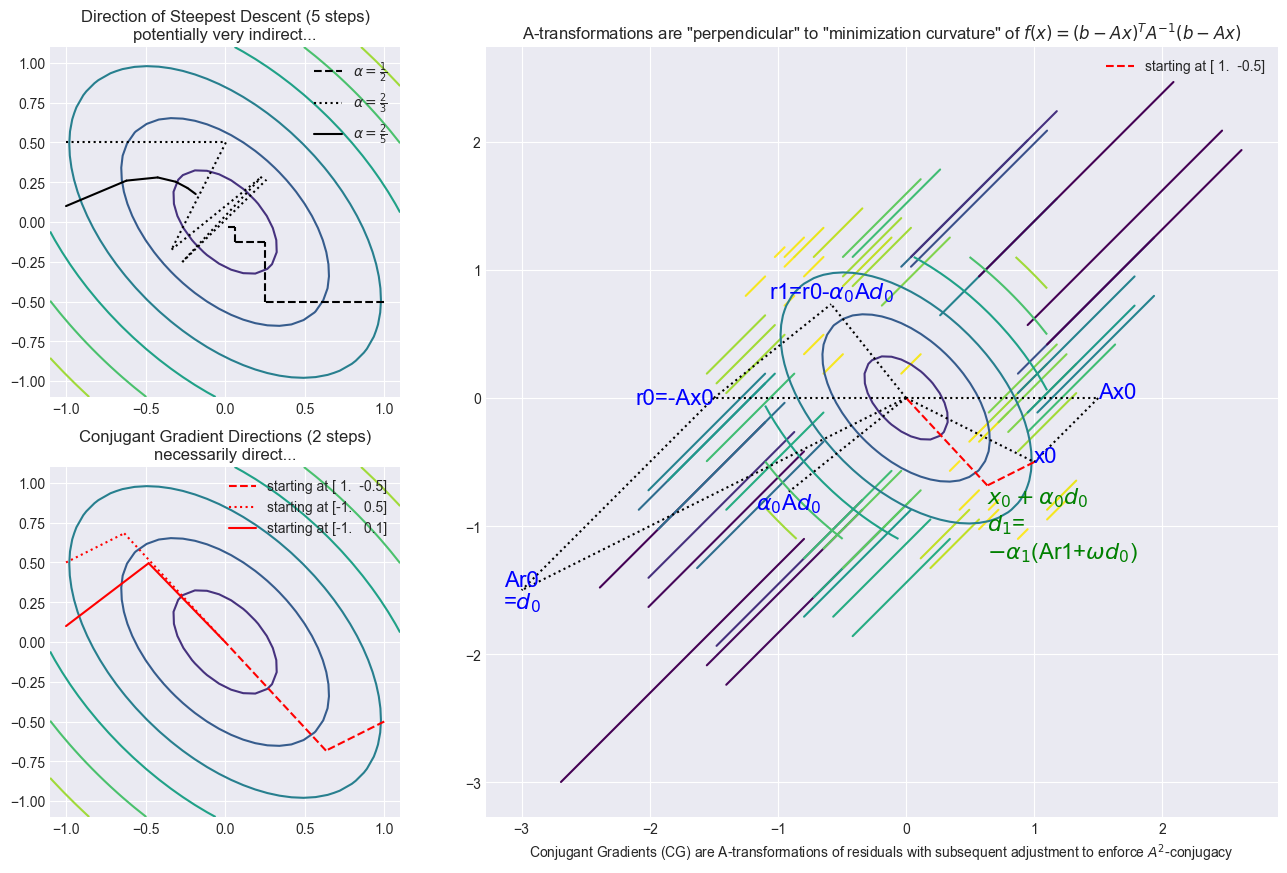

In [12]:
def plot_2D_gradient_descent(current, gradient, stepsize, 
                             ax, label=None, style='k'):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current` 
    in the negative 2D direction of `gradient` 
    with length of `stepsize` times `gradient`
  """

  next = current - stepsize*gradient

  ax.plot([current[0],next[0]], [current[1],next[1]], style, label=label)
  return next
                   

def plot_2D_conjugant_gradient(
  A, current_proposal, residual, Ar, Ar_L2sq, conjugant_gradient, 
  ax, label=None, style='k', verbose=None):

  """
    plots on `ax` with `label` and `style`
    a line from the 2D point `current_proposal` 
    in the direction of the conjugate gradient 
    with length of `correct_stepsize` times the conjugate gradient
    
    A                  : system of linear equations Ax=b being solved for x
    current_proposal   : a current choice for x in Ax=b
    residual           : b - Ax where x is current_proposal
    Ar                 : Ar where r is residual
    Ar_L2sq            : squared L2 norm of Ar 
    conjugant_gradient : direction which was moved resulting in current_proposal
    verbose            : provides verbose explanatory illustrative plotting 

    returns: iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, new_conjugant_gradient
  """

  # b = 0 # ignored for simplicity
  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # residual = 0 - A.dot(current)             # given as function argument
  # Ar = A.dot(residual)                      # given as function argument
  # Ar_L2sq = Ar.dot(Ar) # L2-norm squared    # given as function argument

  # A-transformations are "perpendicular" to "minimization curvature" of b-Ax
  # direction of change in the residual 
  Aconjugant_gradient = A.dot(conjugant_gradient) 
  Aconjugant_gradient_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V1 = Ar_L2sq/Aconjugant_gradient_L2sq

  # x_new = x_old + delta
  iterated_proposal = current_proposal + correct_stepsize_V1*conjugant_gradient

  ax.plot([current_proposal[0],iterated_proposal[0]], 
          [current_proposal[1],iterated_proposal[1]], style, label=label)

  old_residual = residual[:] 
  # new_residual = b - A.dot(iterated_proposal) 
  # new_residual = b - A.dot(current_proposal + correct_stepsize*conjugant_gradient) 
  # new_residual = b - A.dot(current_proposal) - A.dot(correct_stepsize*conjugant_gradient) 
  # new_residual = old_residual - correct_stepsize*Aconjugant_gradient
  # new_residual = b - A(x_old+epsilon*delta) = (b - A(x_old)) - epsilon*A(delta)
  new_residual = residual - correct_stepsize_V1*Aconjugant_gradient
  new_Ar = A.dot(new_residual)
  new_Ar_L2sq = new_Ar.dot(new_Ar)
  # update requires a specific stepsize in the conjugant_gradient direction
  correct_stepsize_V2 = new_Ar_L2sq/Ar_L2sq

  # adjust Ar so result is A-conjugate with previous conjugant_gradients  
  old_conjugant_gradient = conjugant_gradient
  conjugant_gradient = new_Ar + correct_stepsize_V2*conjugant_gradient

  # will be returned from function below after verbose plotting just next
  output = \
  iterated_proposal, new_residual, new_Ar, new_Ar_L2sq, conjugant_gradient

  if not verbose is None:

    ax.plot([0, current_proposal[0]], [0, current_proposal[1]], 'k:')
    ax.text(current_proposal[0], current_proposal[1], 
            'x'+verbose, fontsize=16, c='blue')

    ax.plot([0, A.dot(current_proposal)[0]], [0, A.dot(current_proposal)[1]], 'k:')
    ax.text(A.dot(current_proposal)[0], A.dot(current_proposal)[1], 
            'Ax'+verbose, fontsize=16, c='blue')

    ax.plot([current_proposal[0], A.dot(current_proposal)[0]], 
            [current_proposal[1], A.dot(current_proposal)[1]], 'k:')

    ax.plot([0,old_residual[0]], [0,old_residual[1]], 'k:')
    ax.text(old_residual[0], old_residual[1], 'r'+verbose+'=-Ax'+verbose, 
            fontsize=16, c='blue',
            horizontalalignment='right', verticalalignment='center')
    
    ax.plot([old_residual[0], A.dot(old_residual)[0]], 
            [old_residual[1], A.dot(old_residual)[1]], 'k:')
    ax.text(A.dot(old_residual)[0], A.dot(old_residual)[1], 
            'Ar'+verbose, fontsize=16, c='blue', verticalalignment='bottom', 
            horizontalalignment='center')
    ax.plot([0,old_conjugant_gradient[0]], [0,old_conjugant_gradient[1]], 'k:')
    ax.text(old_conjugant_gradient[0], old_conjugant_gradient[1], 
            '=$d_0$', fontsize=16, c='blue', verticalalignment='top', 
             horizontalalignment='center')

    ax.plot([0, correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(correct_stepsize_V1*Aconjugant_gradient[0], 
            correct_stepsize_V1*Aconjugant_gradient[1], 
            '$\\alpha_0$A$d_0$', fontsize=16, c='blue', 
            verticalalignment='top', horizontalalignment='center')
    ax.plot([old_residual[0], 
             old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [old_residual[1], 
             old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.plot([0, old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0]], 
            [0, old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1]], 'k:')
    ax.text(old_residual[0] - correct_stepsize_V1*Aconjugant_gradient[0], 
            old_residual[1] - correct_stepsize_V1*Aconjugant_gradient[1], 
            'r'+str(int(verbose)+1)+'=r'+verbose+'-$\\alpha_0$A$d_0$', 
            fontsize=16, c='blue', 
            horizontalalignment='center', verticalalignment='bottom')

    Aconjugant_gradient = A.dot(conjugant_gradient)
    ACG_L2sq = Aconjugant_gradient.dot(Aconjugant_gradient)
    tmp = -new_Ar_L2sq/ACG_L2sq*(conjugant_gradient)
    ax.text(tmp[0], tmp[1], 
            '$x_0+\\alpha_0 d_0$\n$d_1$=\n$-\\alpha_1$(Ar'+str(int(verbose)+1)+'+$\\omega d_0$)', 
            fontsize=16, c='green', 
            horizontalalignment='left', verticalalignment='top')
    
  return output


# https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html
n = 30
x1,x2 = np.meshgrid(np.linspace(-1.1,1.1,n),np.linspace(-1.1,1.1,n))
X = np.concatenate([x1.reshape(n**2, 1), x2.reshape(n**2, 1)], axis=1)
# for the min_x ||(Ax-b)^TA(Ax-b)||_2 problem (with b=0) and
A = np.diag([1,1])+1.
#y = (X.dot(A).dot(np.linalg.inv(A))*X.dot(A)).sum(axis=1).reshape(n,n)
y = (X.dot(A)*X).sum(axis=1).reshape(n,n) # same as above

plt.style.use('seaborn-darkgrid') # whitegrid
plt.set_cmap("viridis")
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(231)
# https://stackoverflow.com/questions/7965743/how-can-i-set-the-aspect-ratio-in-matplotlib
ax.set_aspect('equal')
ax.contour(x1, x2, np.sqrt(y))


x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1, .1])
epsilons = 0.5, 0.67, 0.2
labels = "$\\alpha=\\frac{1}{2}$", "$\\alpha=\\frac{2}{3}$", "$\\alpha=\\frac{2}{5}$"
styles = 'k--', 'k:', 'k'
for x0, epsilon, label, style in zip(x0s, epsilons, labels, styles):
  for label in [label]+4*[None]:
    x0 = plot_2D_gradient_descent(current=x0, gradient=A.dot(x0), stepsize=epsilon, 
                                  ax=ax, label=label, style=style)

ax.legend()
ax.set_title('Direction of Steepest Descent (5 steps)\npotentially very indirect...')


ax = fig.add_subplot(234)
ax.contour(x1, x2, np.sqrt(y))
ax.set_aspect('equal')


# initializing conjugant_gradient=0 and CG_L2sq=1 to disappear first time 
initial_proposal = np.array([1, -0.5])

x0s = np.array([1, -0.5]), np.array([-1, 0.5]), np.array([-1.0, 0.1])
styles = 'r--', 'r:', 'r'
for initial_proposal, style in zip(x0s, styles):
  r = -A.dot(initial_proposal)
  Ar = A.dot(r)
  Ar_L2sq = Ar.dot(Ar)
  updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient= \
  plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient=Ar, ax=ax, style=style,
                             label="starting at "+str(initial_proposal))
  plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq, 
                             conjugant_gradient, ax=ax, style=style)

ax.legend()
ax.set_title('Conjugant Gradient Directions (2 steps)\nnecessarily direct...')


ax = fig.add_subplot(2,3,(2,6))
cmap = matplotlib.cm.get_cmap('viridis')
ax.set_aspect('equal')
for a,b in zip(X,X.dot(A)): 
  if stats.bernoulli(.1*np.abs(a[0]-a[1])).rvs(1)[0]:
    plt.plot([a[0],b[0]],[a[1],b[1]], color=cmap(1-(a-b).dot(a-b)/3))
ax.contour(x1, x2, np.sqrt(y))

initial_proposal = np.array([1, -0.5])
style = 'r--'
r = -A.dot(initial_proposal)
Ar = A.dot(r)
Ar_L2sq = Ar.dot(Ar)
updated_proposal, r, Ar, Ar_L2sq, conjugant_gradient = \
plot_2D_conjugant_gradient(A, initial_proposal, r, Ar, Ar_L2sq, 
                           conjugant_gradient=Ar, ax=ax, style=style,
                           label="starting at "+str(initial_proposal), 
                           verbose="0")#"0"
plot_2D_conjugant_gradient(A, updated_proposal, r, Ar, Ar_L2sq,  
                           conjugant_gradient, ax=ax, style=style,
                           verbose=None)

ax.legend()
ax.set_title('A-transformations are "perpendicular" to "minimization curvature" of $f(x) = (b-Ax)^TA^{-1}(b-Ax)$')
_ = ax.set_xlabel('Conjugant Gradients (CG) are A-transformations of residuals with subsequent adjustment to enforce $A^2$-conjugacy')